In [81]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)



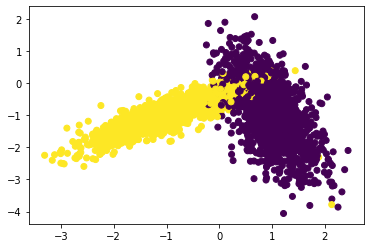

In [82]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

In [107]:
import random
from sklearn.metrics import accuracy_score

def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    # x_train: its numpy array of shape, (n,d)
    # y_train: its numpy array of shape, (n,) or (n,1)
    # classifier: its typically KNeighborsClassifier()
    # param_range: its a tuple like (a,b) a < b
    # folds: an integer, represents number of folds we need to devide the data and test our model
    
    params=[]
    trainscores=[]
    testscores=[]
    
    params=random.sample(params_range,10)
    params.sort()
  
    print('parameters ' , params)
    
    k_x_fold = np.array_split(x_train, folds)
    k_y_fold = np.array_split(y_train, folds)
    
    for k in tqdm(params):
       
        trainscores_folds = []
        testscores_folds  = []

        
        for i in range(folds):
            x_train = k_x_fold.copy() 
            x_test = k_x_fold[i]
          
            y_train = k_y_fold.copy() 
            y_test = k_y_fold[i]
            
            del x_train[i]
            del y_train[i]
            
            new_x_train_list=[]
            new_y_train_list=[]
            
            for lst in x_train:
                    new_x_train_list.extend(lst)
            x_training_data=np.array(new_x_train_list)
            
            for lst in y_train:
                    new_y_train_list.extend(lst)
            y_training_data=np.array(new_y_train_list)
            
            
            classifier.n_neighbors = k
            
            classifier.fit(x_training_data,y_training_data)

            Y_predicted = classifier.predict(x_test)
            testscores_folds.append(accuracy_score(y_test, Y_predicted))
            
            Y_predicted = classifier.predict(x_training_data)
            trainscores_folds.append(accuracy_score(y_training_data, Y_predicted))
            
        trainscores.append(np.mean(np.array(trainscores_folds)))
        testscores.append(np.mean(np.array(testscores_folds)))
           
            
    return trainscores,testscores,params

    
    

parameters  [1, 3, 10, 16, 17, 26, 31, 32, 37, 45]


100%|██████████| 10/10 [00:11<00:00,  1.34s/it]


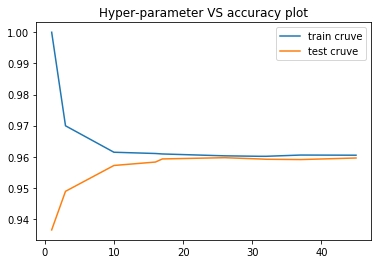

In [110]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")


neigh = KNeighborsClassifier()

params_range = list(range(1,50))
folds = 3

trainscores,testscores,param = RandomSearchCV(x, y, neigh, params_range, folds)

plt.plot(param,trainscores, label='train cruve')
plt.plot(param,testscores, label='test cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

In [111]:
# understanding this code line by line is not that importent 
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

From the plot between hyper-parameter and accuracy , I have ran the model multiple times and conclusion as:
1. Hyper-parameter > 40 : accuracy of the test and train changes slowly as compared to hyper-parameter.
2. Hyper-parameter < 10 : accuracy of train data decreases and test data increases.
3. 10<Hyper-parameter<40 : accuracy of the both the test and train data is stable between this range , So I conclude that hyper-parameter value lies b/w 25 to 30 and I am considering here hyper-parameter value as 26.

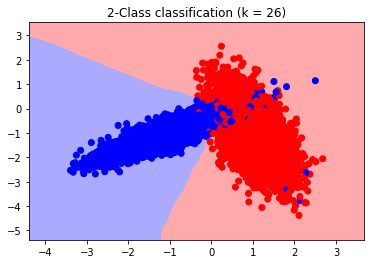

In [122]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 26)
neigh.fit(X_train, y_train)
plot_decision_boundary(x[:, 0], x[:, 1], y, neigh)